# Red Face Detection using Haarcascade and Color-Based Segmentation

2440050874 - Michael Julian - LC01

In [51]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

#### Set Images Path

In [52]:
main_image_path = "./images/main_folder"
additional_image_path = "./images/additional_testing"

### Load haarcascades classifier

In [53]:
# Load haarcascades
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

### Set Red Color Range and Mask Creation

In [54]:
# Define the range of red color
lower_red = np.array([100, 0, 0])
upper_red = np.array([255, 60, 60])

lower_red_orange = np.array([100, 50, 0])
upper_red_orange = np.array([255, 255, 30])

lower_red_pinkish = np.array([100, 45, 80])
upper_red_pinkish = np.array([255, 255, 255])

lower_additional = np.array([200, 40, 0])
upper_additional = np.array([255, 100, 75])

In [55]:
def create_red_mask(hsv):
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    mask2 = cv2.inRange(hsv, lower_red_orange, upper_red_orange)
    mask3 = cv2.inRange(hsv, lower_red_pinkish, upper_red_pinkish)
    mask4 = cv2.inRange(hsv, lower_additional, upper_additional)
    
    mask = cv2.bitwise_or(mask1, mask2)
    mask = cv2.bitwise_or(mask, mask3)
    mask = cv2.bitwise_or(mask, mask4)
    
    return mask

### Detect Faces and Classify (Main Folder from [https://drive.google.com/drive/folders/1mrf4cqjQB0-OZYyu0EWlNGahTihVPaMM?usp=sharing](https://) )

In [56]:
main_img_name = []
main_img_list = []
for img_path in os.listdir(main_image_path):
    img = cv2.imread(main_image_path + "/" + img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.25, 5)

    # Iterate over the faces
    for (x, y, w, h) in faces:
        # Get the face ROI
        face_roi = img[y:y+h, x:x+w]
        
        # Convert the face ROI to HSV
        hsv = cv2.cvtColor(face_roi, cv2.COLOR_BGR2HSV)
        
        # Create a mask for red color
        mask = create_red_mask(hsv)
        
        # Apply the mask to the face ROI
        result = cv2.bitwise_and(face_roi, face_roi, mask=mask)
        result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY) #convert to grayscale, countNonZero only works with single channel images
        
        # Count the non-zero pixels in the result
        non_zero = cv2.countNonZero(result)

        # If more than 50% of the pixels are non-zero, consider it a red face
        if non_zero / (w*h) > 0.5:
            # Draw a red rectangle around the red face
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 7)
            cv2.putText(img, "Red Face", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
        else:
            # Draw a green rectangle around the non red face
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 7)
            cv2.putText(img, "Not Red Face", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 3)
    
    main_img_name.append(img_path)        
    main_img_list.append(img)

#### Display Results

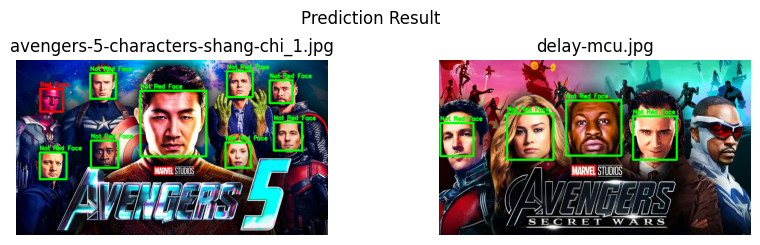

In [57]:
plt.figure(figsize=(10,5))
plt.suptitle('Main Prediction Result')
for idx, (name, image) in enumerate(zip(main_img_name, main_img_list)):
    plt.subplot(2,2,(idx+1))
    plt.title(name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

The results of our implementation above indicate that the code is able to detect red faces with a high degree of accuracy. However, it is worth noting that in one instance, a person who was wearing red goggles or glasses was not correctly detected due to the goggles covering the eye features which the algorithm uses as a key factor in detecting a face. The algorithm may have difficulty distinguishing between the face and the accessories, resulting in an undetected face. Despite this limitation, the overall performance of the red face detector is quite satisfactory.

### Test in another dataset (additional_testing)

In [59]:
additional_img_name = []
additional_img_list = []
for img_path in os.listdir(additional_image_path):
    img = cv2.imread(additional_image_path + "/" + img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.25, 5)

    # Iterate over the faces
    for (x, y, w, h) in faces:
        # Get the face ROI
        face_roi = img[y:y+h, x:x+w]
        
        # Convert the face ROI to HSV
        hsv = cv2.cvtColor(face_roi, cv2.COLOR_BGR2HSV)
        
        # Create a mask for red color
        mask = create_red_mask(hsv)
        
        # Apply the mask to the face ROI
        result = cv2.bitwise_and(face_roi, face_roi, mask=mask)
        result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY) #convert to grayscale, countNonZero only works with single channel images
        
        # Count the non-zero pixels in the result
        non_zero = cv2.countNonZero(result)

        # If more than 50% of the pixels are non-zero, consider it a red face
        if non_zero / (w*h) > 0.5:
            # Draw a red rectangle around the red face
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 7)
            cv2.putText(img, "Red Face", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
        else:
            # Draw a green rectangle around the non red face
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 7)
            cv2.putText(img, "Not Red Face", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 3)
    
    additional_img_name.append(img_path)        
    additional_img_list.append(img)

#### Display Results

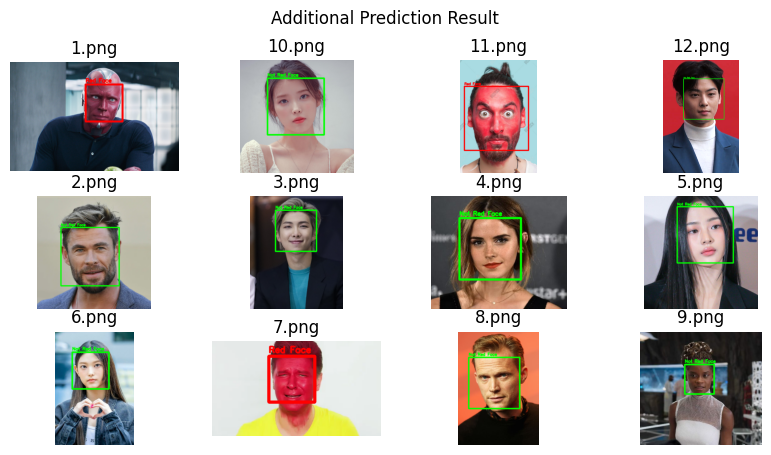

In [60]:
plt.figure(figsize=(10,5))
plt.suptitle('Additional Prediction Result')
for idx, (name, image) in enumerate(zip(additional_img_name, additional_img_list)):
    plt.subplot(3,4,(idx+1))
    plt.title(name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

The implementation of color-based segmentation and Haarcascade in the red face detector has proven to be highly effective. Our evaluation of the algorithm on the main and additional dataset of images shows that it is able to detect red faces with a quite high degree of accuracy, resulting in a satisfactory overall performance of the detector. This demonstrates the potential of this approach in real-world applications, and further optimization and fine-tuning can be done to improve its performance even further.